In [6]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

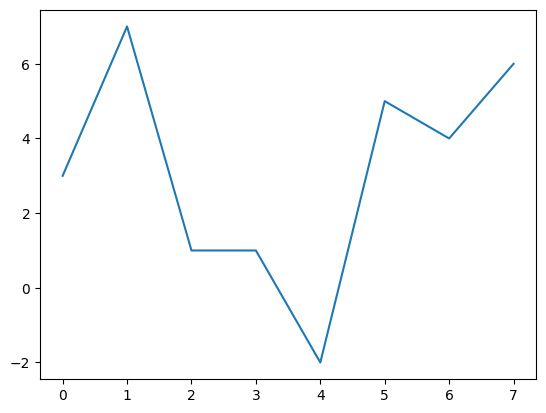

In [16]:
signal = [3, 7, 1, 1, -2, 5, 4, 6]
plt.plot(signal)

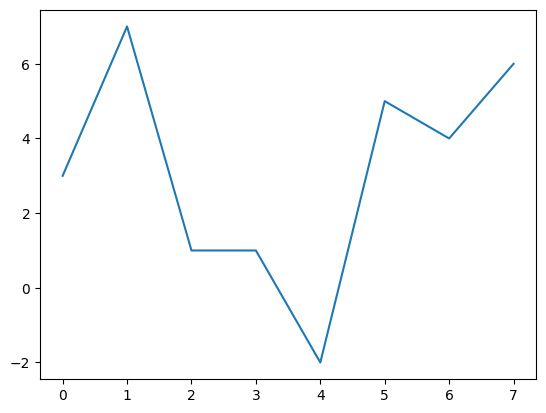

In [ ]:
cA, cD = pywt.dwt(signal, "haar")
y = pywt.idwt(cA, cD, "haar")
plt.plot(y)

In [ ]:
pywt.wavelist(kind="continuous")

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

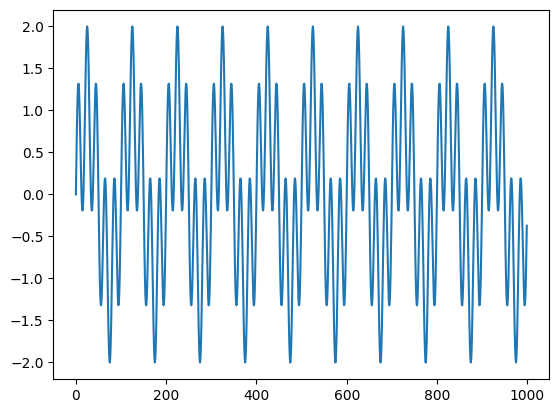

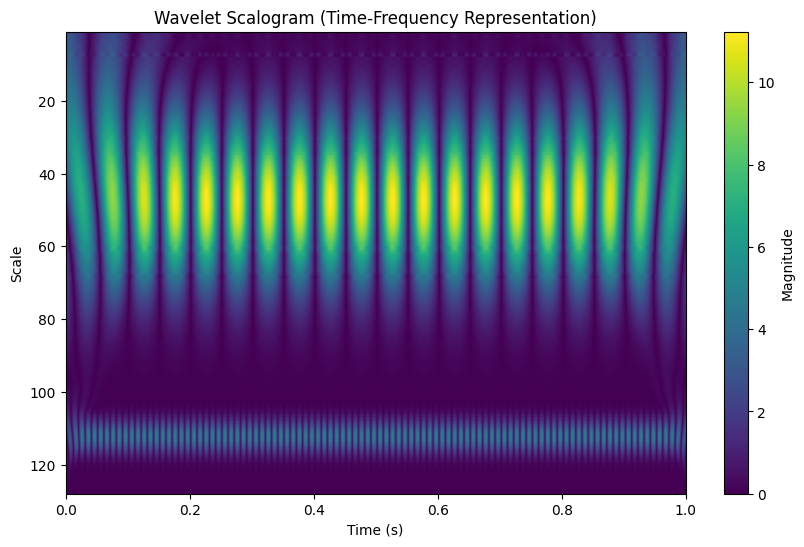

In [ ]:
# Simulate a signal (or load your own)
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 50 * t)

plt.plot(signal)

# Define scales (related to frequency)
scales = np.arange(1, 128)

# Perform Continuous Wavelet Transform
coefficients, frequencies = pywt.cwt(signal, scales, "morl", sampling_period=1 / 1000)

# Plot the scalogram (like a spectrogram)
plt.figure(figsize=(10, 6))
plt.imshow(
    np.abs(coefficients),
    extent=[0, 1, 1, 128],
    cmap="viridis",
    aspect="auto",
    vmax=np.abs(coefficients).max(),
    vmin=0,
)
plt.gca().invert_yaxis()
plt.colorbar(label="Magnitude")
plt.title("Wavelet Scalogram (Time-Frequency Representation)")
plt.ylabel("Scale")
plt.xlabel("Time (s)")
plt.show()

69


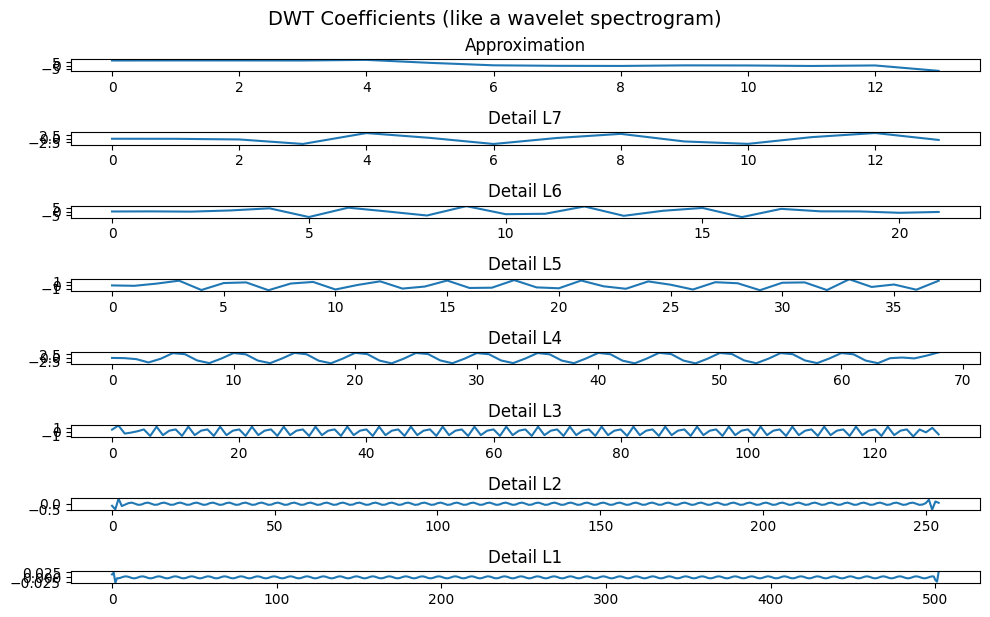

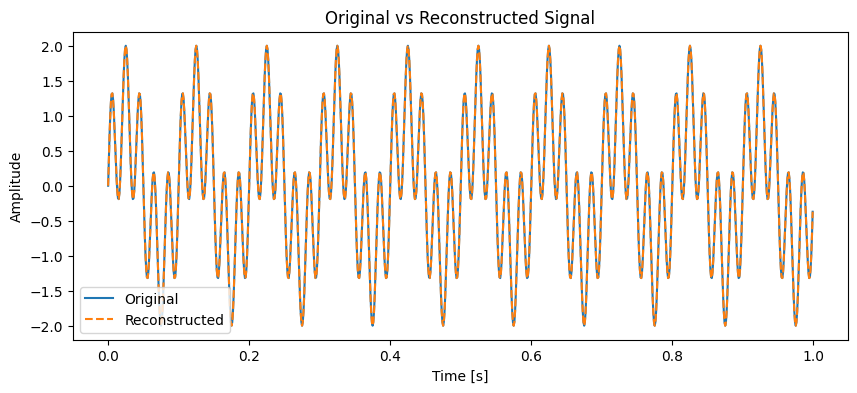

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# 1. Create a sample signal
fs = 1000  # Sampling frequency in Hz
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 50 * t)

# 2. Perform multi-level discrete wavelet decomposition
wavelet = "db4"
level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
coeffs = pywt.wavedec(signal, wavelet, level=level)
print(len(coeffs[4]))

# 3. Visualize the coefficients (like a spectrogram)
plt.figure(figsize=(10, 6))
for i, c in enumerate(coeffs):
    plt.subplot(len(coeffs), 1, i + 1)
    plt.plot(c)
    label = "Approximation" if i == 0 else f"Detail L{level - i + 1}"
    plt.title(label)
    plt.tight_layout()

plt.suptitle("DWT Coefficients (like a wavelet spectrogram)", fontsize=14, y=1.02)
plt.show()

# 4. Reconstruct the signal
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# 5. Compare original vs reconstructed
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label="Original")
plt.plot(t, reconstructed_signal[: len(t)], "--", label="Reconstructed")
plt.legend()
plt.title("Original vs Reconstructed Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

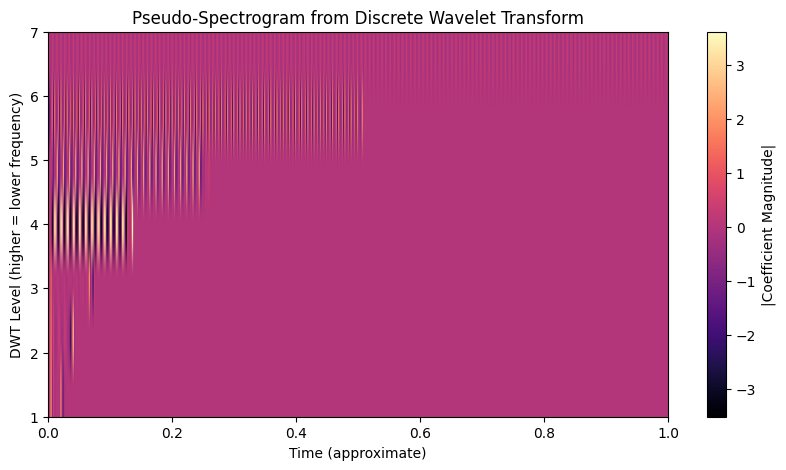

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 1. Generate the signal
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 150 * t)

# 2. Perform multi-level DWT
wavelet = "db4"
max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
coeffs = pywt.wavedec(signal, wavelet, level=max_level)

# 3. Extract and pad detail coefficients (skip approximation at index 0)
detail_coeffs = [c for c in coeffs[1:]]  # list of 1D arrays
max_len = max(len(c) for c in detail_coeffs)

# Pad each row with zeros on the right to match the longest one
padded_rows = [np.pad(c, (0, max_len - len(c))) for c in detail_coeffs]
spectrogram = np.vstack(padded_rows)  # Now it's a 2D array

# 4. Plot pseudo-spectrogram
plt.figure(figsize=(10, 5))
plt.imshow(
    spectrogram,
    aspect="auto",
    origin="lower",
    extent=[0, 1, 1, max_level],
    cmap="magma",
)
plt.xlabel("Time (approximate)")
plt.ylabel("DWT Level (higher = lower frequency)")
plt.title("Pseudo-Spectrogram from Discrete Wavelet Transform")
plt.colorbar(label="|Coefficient Magnitude|")
plt.show()

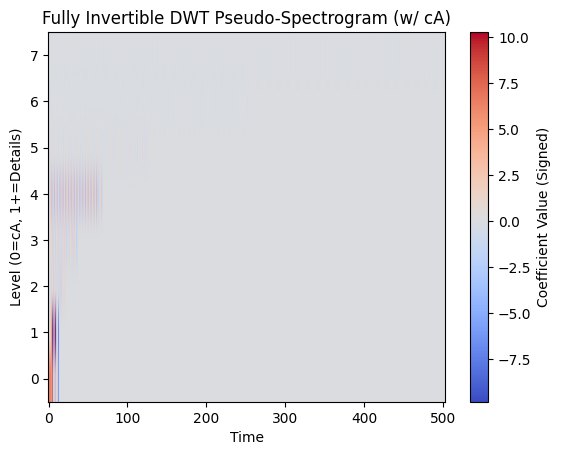

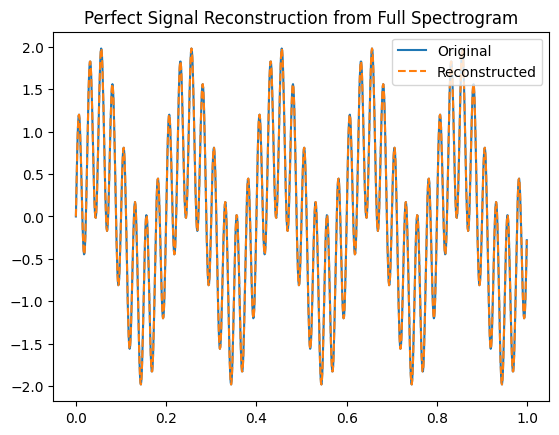

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# 1. Generate signal
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 40 * t)

# 2. DWT decomposition
wavelet = "db4"
max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
coeffs = pywt.wavedec(signal, wavelet, level=max_level)

# 3. Include *all* coeffs: [cA, cD1, ..., cDn]
all_coeffs = coeffs  # includes approximation (cA) and details (cDs)

# 4. Pad all rows to same length
original_lengths = [len(c) for c in all_coeffs]
max_len = max(original_lengths)
padded_rows = [np.pad(c, (0, max_len - len(c))) for c in all_coeffs]

# 5. Stack into full pseudo-spectrogram (including cA)
spectrogram = np.vstack(padded_rows)

# 6. Show spectrogram
plt.imshow(spectrogram, aspect="auto", origin="lower", cmap="coolwarm")
plt.colorbar(label="Coefficient Value (Signed)")
plt.title("Fully Invertible DWT Pseudo-Spectrogram (w/ cA)")
plt.xlabel("Time")
plt.ylabel("Level (0=cA, 1+=Details)")
plt.show()

# 7. --- RECONSTRUCT from spectrogram only ---
# Infer number of levels and coeff lengths from spectrogram shape
num_levels, padded_len = spectrogram.shape

# Recover original coefficient vectors by trimming trailing zeros
recovered_coeffs = [row[:length] for row, length in zip(spectrogram, original_lengths)]

# 8. Inverse DWT
reconstructed = pywt.waverec(recovered_coeffs, wavelet)

# 9. Compare to original
plt.plot(t, signal, label="Original")
plt.plot(t, reconstructed[: len(t)], "--", label="Reconstructed")
plt.legend()
plt.title("Perfect Signal Reconstruction from Full Spectrogram")
plt.show()

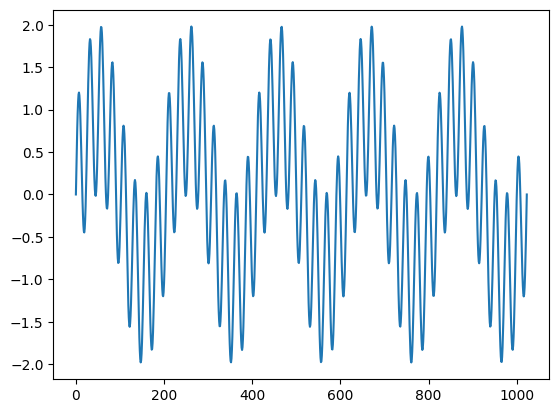

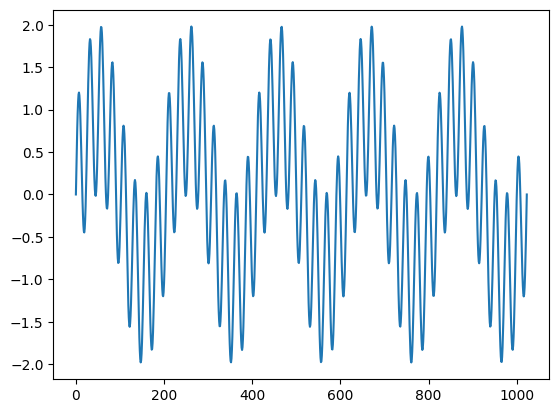

In [ ]:
import numpy as np
import pywt


def dwt_to_grid(signal, wavelet="db4", level=4, mode="symmetric"):
    coeffs = pywt.wavedec(signal, wavelet, level=level, mode=mode)
    lengths = [len(c) for c in coeffs]
    max_len = max(lengths)
    padded = [np.pad(c, (0, max_len - len(c))) for c in coeffs]
    grid = np.stack(padded, axis=0)
    return grid, lengths


def grid_to_signal(grid, lengths, wavelet="db4", mode="symmetric"):
    coeffs = [grid[i, : lengths[i]] for i in range(len(lengths))]
    return pywt.waverec(coeffs, wavelet, mode=mode)


# Example usage

N = 1024
x = np.sin(2 * np.pi * 5 * np.linspace(0, 1, N)) + np.sin(
    2 * np.pi * 40 * np.linspace(0, 1, N)
)
grid, lengths = dwt_to_grid(x, level=4, mode="periodization")
x_recon = grid_to_signal(grid, lengths, mode="periodization")

plt.plot(x)
plt.show()
plt.plot(x_recon)
plt.show()